In [47]:
import json
from gensim.models import LdaModel
from gensim.corpora import Dictionary

from matplotlib import pyplot as plt

In [2]:
with open('politics_tokens.json', 'r') as f:
    politics_tokens = json.load(f) 

In [3]:
print(len(politics_tokens))

925937


In [4]:
# politics_dictionary = Dictionary(politics_tokens)
politics_dictionary = Dictionary.load("stored_variables/politics_dictionary_lda")

In [5]:
# politics_dictionary.filter_extremes(no_below = 10, no_above = 0.3)

In [16]:
politics_dictionary[0]

'did'

In [17]:
print('she' in politics_dictionary.token2id.keys())
print('her' in politics_dictionary.token2id.keys())
print('he' in politics_dictionary.token2id.keys())
print('his' in politics_dictionary.token2id.keys())
print('of' in politics_dictionary.token2id.keys())
print('to' in politics_dictionary.token2id.keys())
print('the' in politics_dictionary.token2id.keys())
print('in' in politics_dictionary.token2id.keys())
print('was' in politics_dictionary.token2id.keys())
print('it' in politics_dictionary.token2id.keys())
print('a' in politics_dictionary.token2id.keys())

True
True
True
True
False
False
False
False
True
False
False


In [8]:
politics_corpus = [politics_dictionary.doc2bow(text) for text in politics_tokens]

In [9]:
print(politics_tokens[100])
print(politics_corpus[100])

['the', 'obama', 'thing', 'was', 'a', 'joke', 'if', 'you', 'want', 'to', 'ding', 'her', 'for', 'that', 'comment', 'you', 'must', 'have', 'been', 'already', 'been', 'looking', 'for', 'excuses', 'not', 'to', 'vote', 'for', 'her', 'she', 'harps', 'on', 'the', 'fact', 'that', 'no', 'woman', 'ever', 'has', 'been', 'in', 'the', 'position', 'she', 'is', 'in', 'and', 'that', 'women', 'are', 'better', 'negotiators', 'and', 'better', 'at', 'compromising', 'than', 'men', 'are', 'which', 'helps', 'deal', 'with', 'the', 'grid', 'lock', 'in', 'washington']
[(6, 2), (11, 1), (19, 2), (47, 1), (51, 3), (57, 1), (67, 3), (75, 1), (76, 1), (86, 1), (103, 1), (136, 1), (159, 1), (163, 1), (229, 2), (235, 1), (238, 1), (241, 2), (278, 1), (282, 1), (366, 2), (423, 1), (464, 1), (668, 1), (738, 1), (752, 1), (753, 1), (1065, 1), (1102, 1), (1103, 1), (1104, 1), (1105, 1), (1106, 1), (1107, 1), (1108, 1), (1109, 1), (1110, 1), (1111, 1), (1112, 1), (1113, 1), (1114, 1), (1115, 1), (1116, 1)]


In [34]:
politics_ldamodel = LdaModel(politics_corpus, num_topics = 20, id2word = politics_dictionary)
# politics_ldamodel = LdaModel.load('stored_variables/politics_lda.model')

In [38]:
politics_ldamodel.save("stored_variables/politics_lda.model")

In [87]:
# politics_dictionary.save("stored_variables/politics_dictionary_lda")

In [39]:
[politics_dictionary.id2token[i] for i,j in politics_ldamodel.get_topic_terms(1)]

['media',
 'video',
 'energy',
 'data',
 'amp',
 'kasich',
 'numbers',
 'posted',
 'low',
 'event']

In [35]:
politics_ldamodel.get_topic_terms(1)

[(389, 0.047588162),
 (976, 0.020041214),
 (848, 0.01857868),
 (957, 0.016969176),
 (791, 0.01665543),
 (613, 0.013870119),
 (2932, 0.013312979),
 (6919, 0.012237587),
 (972, 0.011866175),
 (3383, 0.011747359)]

In [37]:
for topic_num in range(20):
    print([politics_dictionary.id2token[i] for i,j in politics_ldamodel.get_topic_terms(topic_num)])

['right', 'left', 'yeah', 'liberal', 'oh', 'now', 'yes', 'conservative', 'too', 'hate']
['media', 'video', 'energy', 'data', 'amp', 'kasich', 'numbers', 'posted', 'low', 'event']
['us', 'war', 'american', 'america', 'country', 'foreign', 'iraq', 'immigration', 'illegal', 'military']
['they', 'people', 'are', 'their', 'them', 'have', 'for', 'who', 'be', 'get']
['you', 'your', 're', 'what', 'if', 'do', 'are', 'not', 'can', 'about']
['she', 'her', 'clinton', 'hillary', 'has', 'for', 'on', 'campaign', 'as', 'about']
['more', 'than', 'better', 'less', 'much', 'rather', 'far', 'voter', 'worse', 'likely']
['we', 'our', 'us', 'government', 'have', 'on', 'has', 'system', 'by', 'world']
['m', 'not', 'but', 'my', 'be', 'me', 'like', 'sure', 'this', 'would']
['he', 'his', 'him', 'trump', 'has', 'on', 'as', 'with', 'about', 'like']
['be', 'not', 'or', 'for', 'gun', 'law', 'no', 'by', 'if', 'would']
['this', 'on', 'black', 'article', 'read', 'post', 'lol', 'white', 'reddit', 'here']
['t', 'don', 'th

## Look at distribution of topics among comments

In [36]:
politics_ldamodel.top_topics(politics_corpus)

[([(0.17355762, 'you'),
   (0.03698255, 'your'),
   (0.025821779, 're'),
   (0.025512965, 'what'),
   (0.020932386, 'if'),
   (0.020807067, 'do'),
   (0.020006226, 'are'),
   (0.016639015, 'not'),
   (0.014003767, 'can'),
   (0.013814589, 'about'),
   (0.01376073, 'have'),
   (0.010218419, 'with'),
   (0.010044276, 'how'),
   (0.009682757, 'just'),
   (0.009282239, 'so'),
   (0.008572297, 'know'),
   (0.00849236, 'or'),
   (0.008131667, 'for'),
   (0.008016175, 'think'),
   (0.007160463, 'no')],
  -1.4158095013741092),
 ([(0.04703717, 'they'),
   (0.036332354, 'people'),
   (0.029785072, 'are'),
   (0.022301001, 'their'),
   (0.017481891, 'them'),
   (0.014294602, 'have'),
   (0.013151588, 'for'),
   (0.012565468, 'who'),
   (0.011973164, 'be'),
   (0.011148571, 'get'),
   (0.010797547, 'with'),
   (0.010295737, 'there'),
   (0.010251641, 'will'),
   (0.0099968165, 'money'),
   (0.00985312, 'out'),
   (0.00966517, 'all'),
   (0.009331192, 'up'),
   (0.008558024, 'just'),
   (0.00854943

In [45]:
for i in range(10):
    print(sorted(politics_ldamodel[politics_corpus[i]], key = lambda x : x[1], reverse = True))


[(9, 0.49611714), (4, 0.37530792)]
[(3, 0.6581433), (4, 0.1364694), (7, 0.13454887)]
[(17, 0.42205444), (3, 0.34799072), (12, 0.08558777), (8, 0.045291536), (9, 0.04202645), (14, 0.035813298)]
[(0, 0.524989), (11, 0.025000583), (1, 0.025000578), (2, 0.025000578), (3, 0.025000578), (4, 0.025000578), (5, 0.025000578), (6, 0.025000578), (7, 0.025000578), (8, 0.025000578), (9, 0.025000578), (10, 0.025000578), (12, 0.025000578), (13, 0.025000578), (14, 0.025000578), (15, 0.025000578), (16, 0.025000578), (17, 0.025000578), (18, 0.025000578), (19, 0.025000578)]
[(16, 0.5183165), (9, 0.4254268)]
[(16, 0.68332237), (7, 0.016667252), (0, 0.016667245), (1, 0.016667245), (2, 0.016667245), (3, 0.016667245), (4, 0.016667245), (5, 0.016667245), (6, 0.016667245), (8, 0.016667245), (9, 0.016667245), (10, 0.016667245), (11, 0.016667245), (12, 0.016667245), (13, 0.016667245), (14, 0.016667245), (15, 0.016667245), (17, 0.016667245), (18, 0.016667245), (19, 0.016667245)]
[(12, 0.16283423), (3, 0.14900589),

In [46]:
top_topic_by_doc = []

for doc in politics_corpus:
    topic_list_doc = sorted(politics_ldamodel[doc], key = lambda x : x[1], reverse = True)
    top_topic_by_doc.append(topic_list_doc[0][0])
    

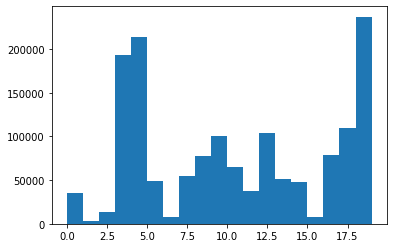

In [55]:
plt.hist(top_topic_by_doc, bins = list(range(20)))
plt.show()

In [51]:
politics_ldamodel[politics_dictionary.doc2bow(['sanders','sanders'])]

[(0, 0.016666697),
 (1, 0.016666697),
 (2, 0.016666697),
 (3, 0.016666697),
 (4, 0.016666697),
 (5, 0.016666697),
 (6, 0.016666697),
 (7, 0.016666697),
 (8, 0.016666697),
 (9, 0.016666697),
 (10, 0.016666697),
 (11, 0.016666697),
 (12, 0.016666697),
 (13, 0.016666697),
 (14, 0.68333274),
 (15, 0.016666697),
 (16, 0.016666697),
 (17, 0.016666697),
 (18, 0.016666697),
 (19, 0.016666697)]

## Topic differences by author

In [52]:
with open('stored_variables/politics_tokens_auth_sample.json', 'r') as f:
    politics_tokens_auth = json.load(f) 

In [53]:
politics_corpus_auth = [politics_dictionary.doc2bow(text) for text in politics_tokens_auth]

In [57]:
top_topic_by_doc_auth = []

for doc in politics_corpus_auth:
    topic_list_doc = sorted(politics_ldamodel[doc], key = lambda x : x[1], reverse = True)
    top_topic_by_doc_auth.append(topic_list_doc[0][0])
    

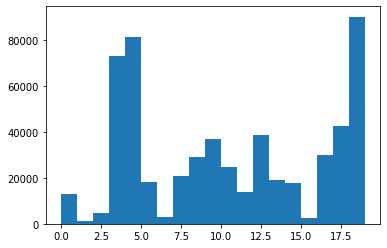

In [58]:
plt.hist(top_topic_by_doc_auth, bins = list(range(20)))
plt.show()